## Intellectual Data Analysis
A few Simple concepts of Machine learning kNN(K nearest neighbours ) and Lineal Regression

### Visualization of Decision Boundaries in kNN.

In this section, we will visualize the decision boundaries for the kNN classifier to better understand how the classifier makes decisions for new instances. For simplicity, we will work with the built-in sklearn dataset wine, which contains information on the characteristics of three types of wine. The description of the dataset can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) and [here](https://rdrr.io/cran/rattle.data/man/wine.html).

*Let's load the dataset and store the feature information in the variable X, and the target variable in the variable y.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Missing Values**

*Let's check for missing values in the dataset and for nominal data.*

In [ ]:
X.isna().sum() # there are no misses
X.dtypes # and no ordinal data
#X = pd.get_dummies(X,drop_first = True) if there was ordinal data


,0
alcohol,float64
malic_acid,float64
ash,float64
alcalinity_of_ash,float64
magnesium,float64
total_phenols,float64
flavanoids,float64
nonflavanoid_phenols,float64
proanthocyanins,float64
color_intensity,float64


**Splitting the Data**

 *Using the train_test_split() function, we will split the data, specifying test_size = 0.3 and fixing the seed because the splitting is random.*

In [6]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

**Задача 1.3 (1 балл)**

Let's train six kNN classifiers on the training set, each differing only in the number of neighbors. For the first classifier, set the number of neighbors to 1, for the second to 3, for the third to 5, for the fourth to 10, for the fifth to 15, and for the sixth to 25.
We will use only two features for training: alcohol and magnesium, and the Euclidean distance metric. Don't forget to scale the features, for example, using the StandardScaler module.

*Let's then evaluate the accuracy on both the training and testing sets for each classifier.*

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [7]:
# choosing the attributes
X_train = X_train[['alcohol', 'magnesium']]
X_test = X_test[['alcohol', 'magnesium']]

# Scaling the training data
scaler = StandardScaler()
original_columns = X_train.columns

X_train_normalised = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train_normalised, columns=original_columns)

# Scaling the testing data
X_test_normalised = scaler.transform(X_test)
X_test = pd.DataFrame(data=X_test_normalised, columns=original_columns)

neighbors_lst = [1, 3, 5, 10, 15, 25]
for n in neighbors_lst:
    clf = KNeighborsClassifier(n_neighbors=n, p=1, n_jobs=10)
    clf.fit(X_train, y_train)
    y_train_predicted = clf.predict(X_train)
    y_predicted = clf.predict(X_test)
    print(f"Accuracy for train: {np.mean(y_train_predicted == y_train):.3f} Accuracy for test: {np.mean(y_predicted == y_test):.3f}")

Accuracy for train: 0.992 Accuracy for test: 0.648
Accuracy for train: 0.823 Accuracy for test: 0.648
Accuracy for train: 0.790 Accuracy for test: 0.685
Accuracy for train: 0.790 Accuracy for test: 0.667
Accuracy for train: 0.758 Accuracy for test: 0.722
Accuracy for train: 0.742 Accuracy for test: 0.722


*The best accuracy without overfitting the model can be seen when n = 15*

**Decision regions grid**

The mlxtend library allows for easily visualizing the decision boundaries of trained classifiers.I have studied the library's [documentation](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) to find out how to create multiple decision boundary plots on a grid (decision regions grid).

*We are going to build such grid!*

**The description of the code:**



*   **Importing Libraries:**


1.   matplotlib for creating plots.
2.   itertools for creating iterators for efficient looping.
3.  plot_decision_regions from mlxtend.plotting to visualize decision boundaries of classifiers.






*   **Feature Selection:**

  The dataset is filtered to include only the alcohol and magnesium features for the classification task.

*  **Data Splitting:**

The data is split into training and testing sets using train_test_split with a 70/30 split ratio.

random_state=42 ensures reproducibility, and stratify=y maintains the class distribution in both training and testing sets.
* **Data Standardization:**

StandardScaler is used to standardize the features, scaling them to have zero mean and unit variance.

The scaler is fit on the training data and then applied to both the training and testing data.
* **Creating kNN Classifiers:**

Six k-Nearest Neighbors (kNN) classifiers are created with different numbers of neighbors (n_neighbors = 1, 3, 5, 10, 15, 25).

Each classifier uses Euclidean distance (p=2).

* **Setting up the Plot Grid:**

A 2x3 grid is set up using GridSpec to hold the decision boundary plots.
A figure of size 15x12 inches is created.
Training and Plotting:

Each classifier is trained on the standardized training data.

For each classifier, a subplot is created in the grid.

The decision regions for each classifier are plotted using plot_decision_regions.

The title of each subplot indicates the number of neighbors used in the kNN classifier.

* **Displaying the Plots:**

plt.tight_layout() is used to adjust the spacing between subplots for a cleaner look.

The plots are displayed using plt.show()

In [ ]:
import mlxtend

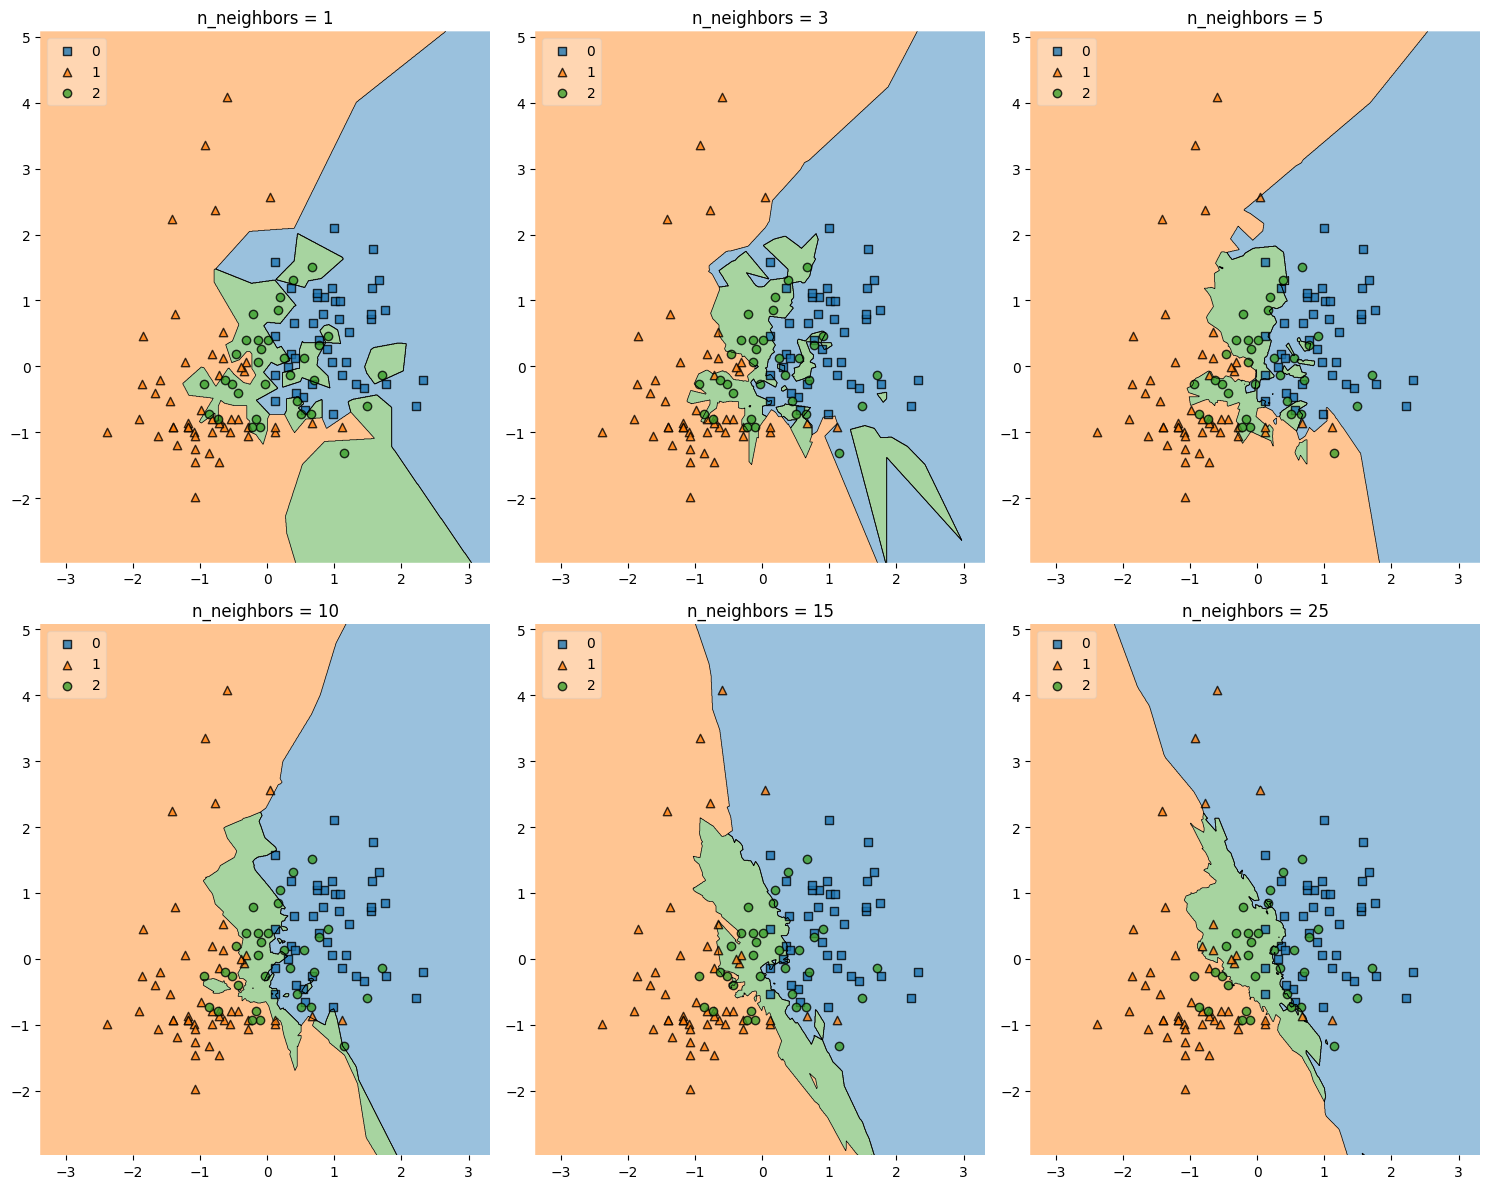

In [ ]:
import matplotlib
import itertools
from mlxtend.plotting import plot_decision_regions
X = X[['alcohol', 'magnesium']]

# Splitting data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# creating kNN Classifiers
classifiers = [KNeighborsClassifier(n_neighbors=k, p=2) for k in [1, 3, 5, 10, 15, 25]]

# Creating the grid for plots
gs = matplotlib.gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15, 12))

labels = ['n_neighbors = 1', 'n_neighbors = 3', 'n_neighbors = 5', 'n_neighbors = 10', 'n_neighbors = 15', 'n_neighbors = 25']

for clf, lab, grd in zip(classifiers, labels, itertools.product(range(2), range(3))):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_train, y_train, clf=clf, legend=2)
    plt.title(lab)

plt.tight_layout()
plt.show()

**Analysing the results**

*  As the number of neighbors increases, the decision boundary becomes smoother and less sensitive to noise and individual data points.

*  Lower values of n_neighbors (like 1 or 3) might lead to overfitting, where the model performs well on the training data but poorly on new data.

*  Higher values of n_neighbors (like 15 or 25) might lead to underfitting, where the model is too simplistic and fails to capture the underlying patterns in the data.
*  The ideal number of neighbors would balance the trade-off between overfitting and underfitting, which typically requires cross-validation to determine.



### KNN Algorithm

*Let's write down the alghorithm for kNN*

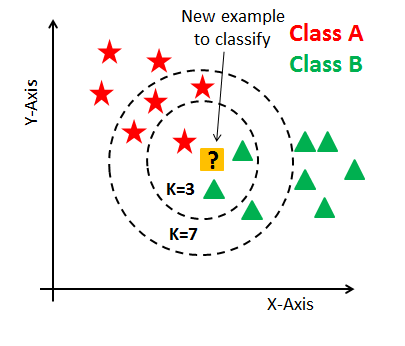

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X = X
      self.y = y

    def predict(self, X):
      predictions = [self._predict(x) for x in X]
      return np.array(predictions)

    def _predict(self,x):
      #finding the distances
      distances = [np.sqrt(np.sum((x- x_train)**2)) for x_train in self.X]
      #getting the indices of the first k elements
      k_indices = np.argsort(distances)[:self.k]
      #getting answers for the first k elements
      k_nearest_labels = [self.y[i] for i in k_indices]
      #counting numbers in the most_common and returning the first
      most_common = Counter(k_nearest_labels).most_common(1)
      return most_common[0][0]

In [ ]:
# Test
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# If it passes all the test the code is right
test_knn(KNN)

### Lineal Regression

In this task, we will explore various aspects of building a linear model. We will work with one of the classic datasets in statistics, which contains information about diamonds. You can find the description  [here](https://www.kaggle.com/shivam2503/diamonds).

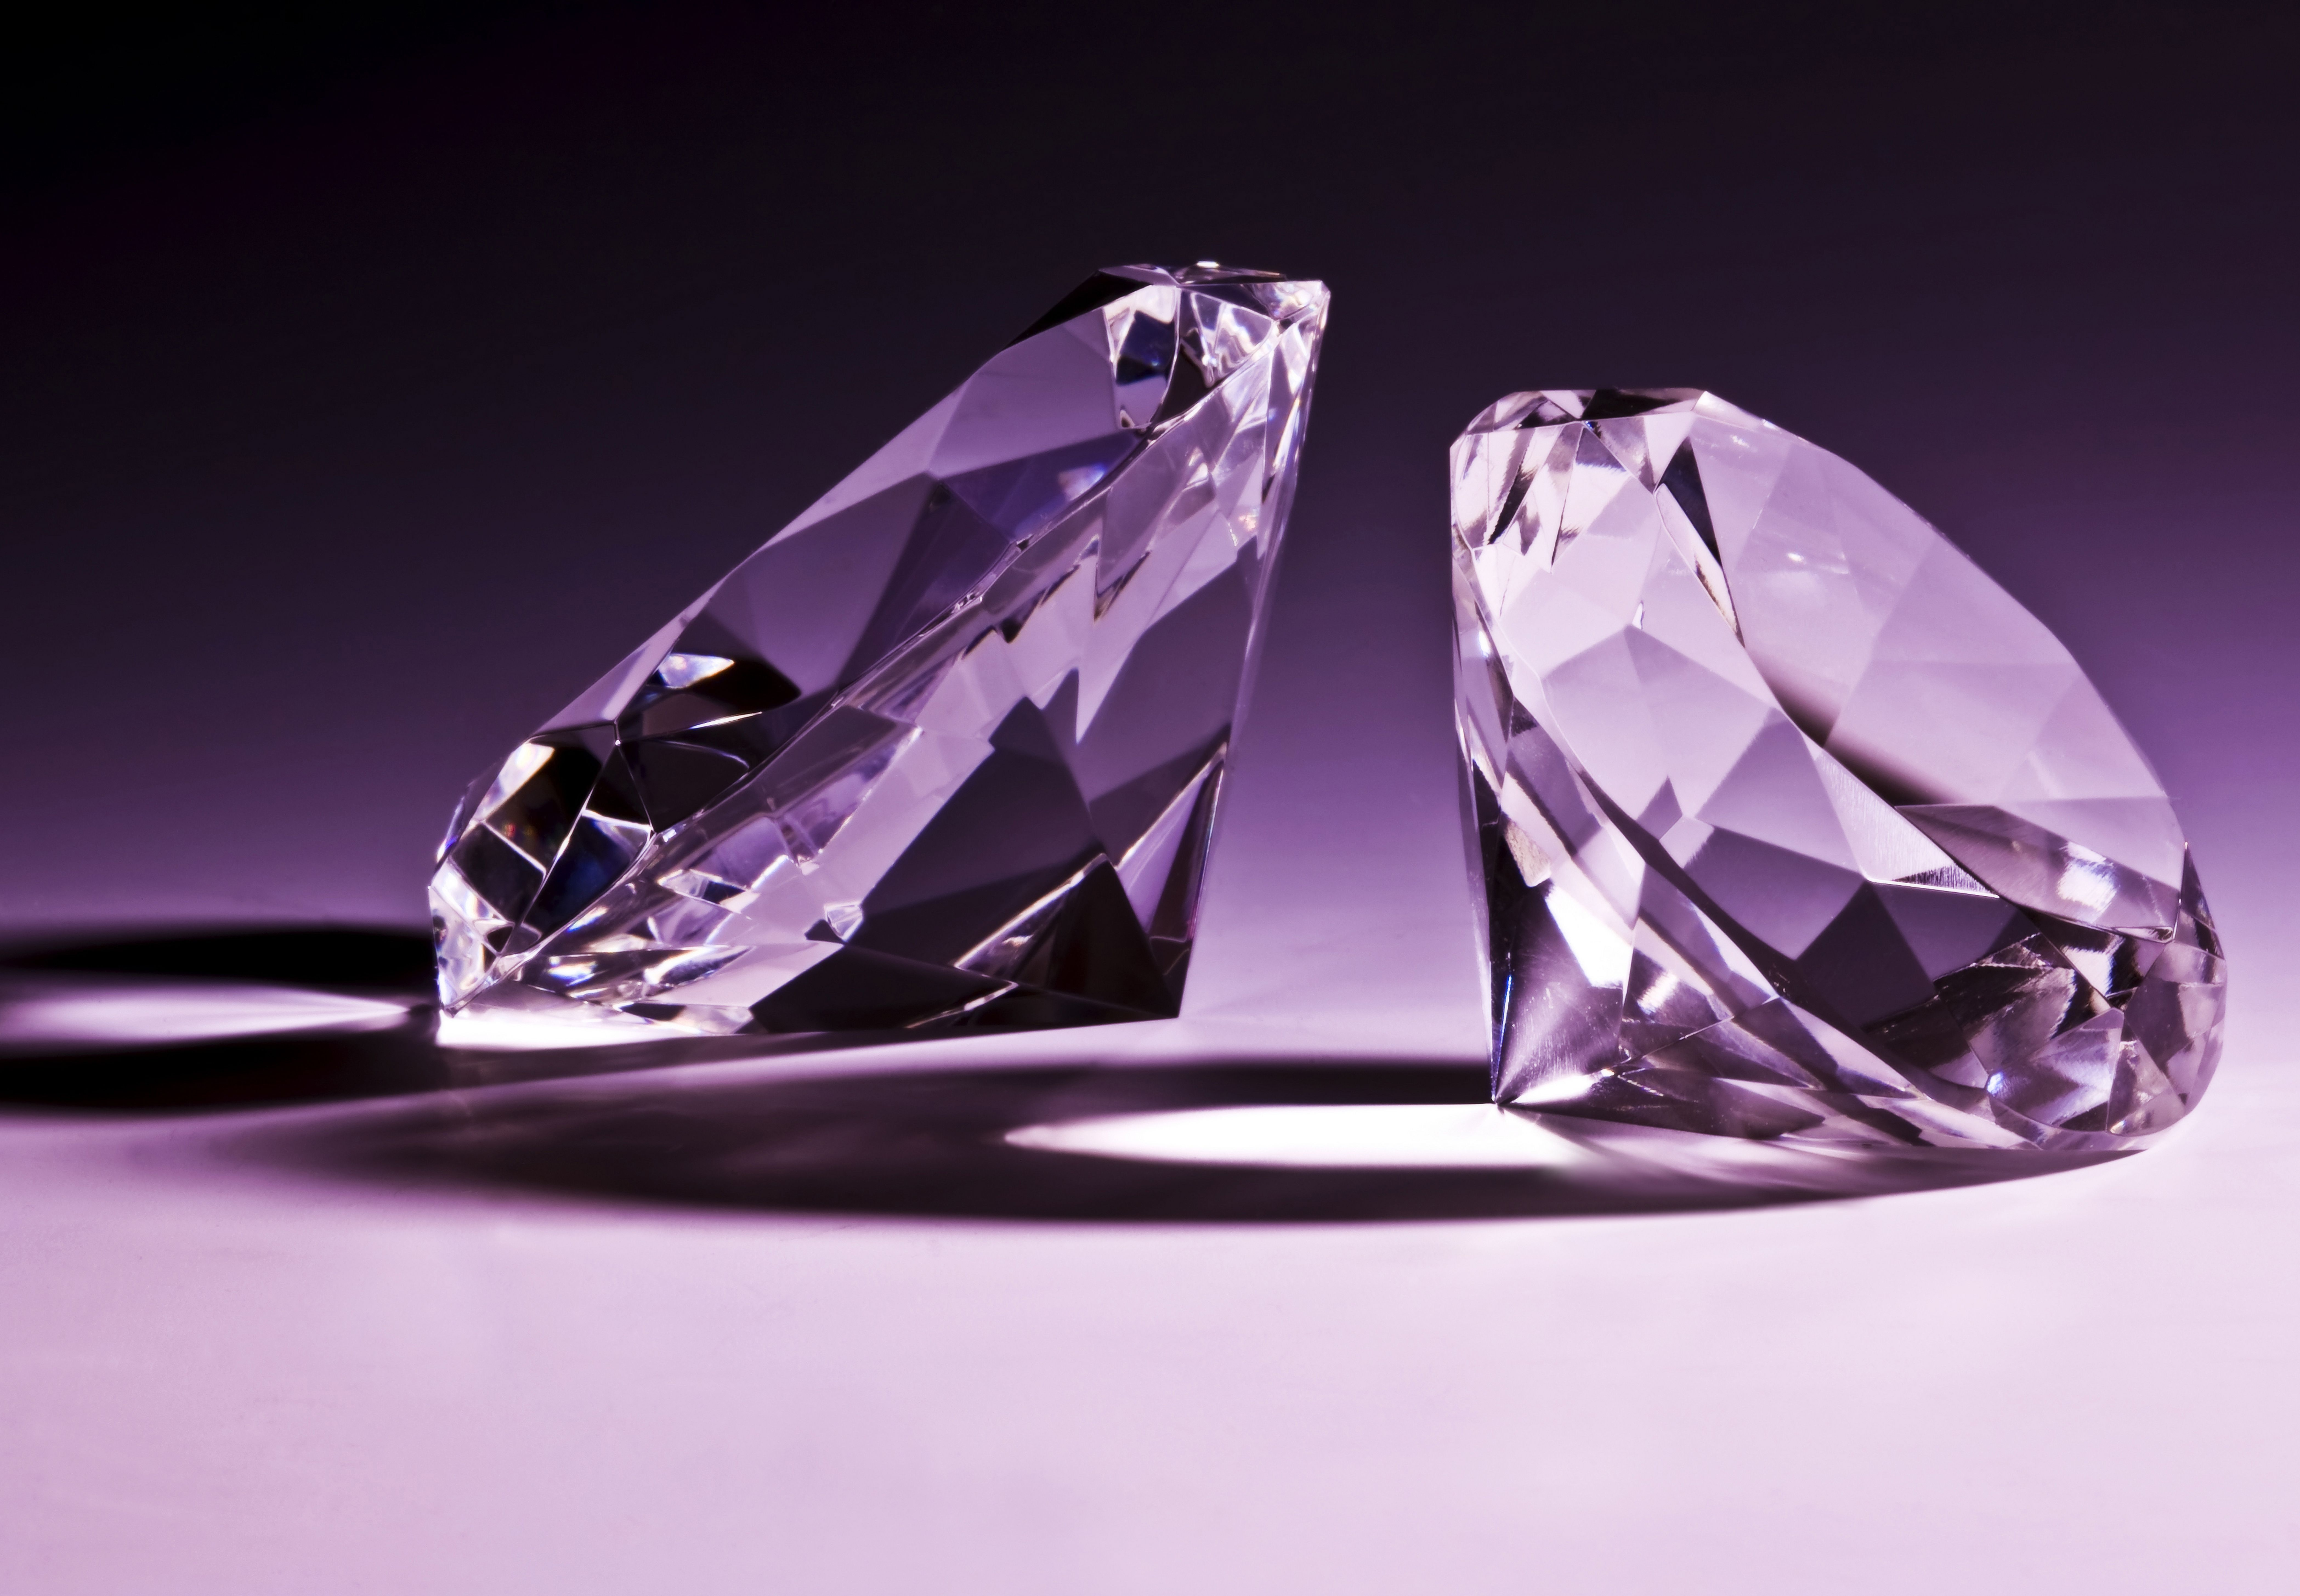

In [14]:
data = pd.read_csv('/content/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


*We will solve the task of forseeing the price of diamonds depending on different aspects.*

***Missing values***

Let's check for a missing values

In [15]:
data.isna().sum() #no misses

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


***Useless data***

*There is useless column named 'Unnamed: 0'*

In [16]:
data = data.drop('Unnamed: 0',axis = 1)
data.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


***Correlation***

Linear regression is based on the assumption of a linear relationship between features and the target variable. Therefore, before selecting variables to include in the model, it makes sense to check how well this relationship holds. For the following steps, we will also need sample correlations between features. Generating a matrix of sample correlations between all numerical features and the target variable (i.e., this matrix will have $k+1$ rows, where $k$ is the number of numerical features).

*And find out which numerical features have the highest correlation with the target variable?*

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

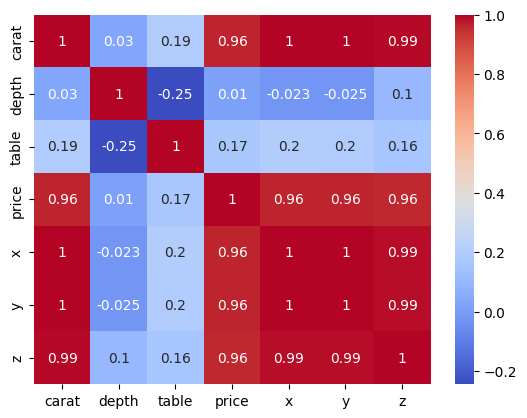

In [18]:
data_cor = data.drop(['color','clarity','cut'],axis = 1)
correlation_matrix = data_cor.corr(method = 'spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**Key Insights:**



1.   **Strong Correlation with Price:**

*   "Carat" has a high positive correlation with "price" (0.96), indicating that larger diamonds tend to be more expensive.
*   The dimensions "x", "y", and "z" also strongly correlate with "price" (0.96), suggesting that larger overall size increases price.


2.   **High Inter-correlation Among Dimensions:**
*    "x", "y", and "z" are almost perfectly correlated with each other, which could cause multicollinearity issues in a regression model.

3.  **Weak Correlations:**
*    "Depth" and "table" have weak or negative correlations with "price" and other features, indicating a less straightforward relationship with price.


***Implications:***

Focus on "carat" and dimensions ("x", "y", "z") for modeling.
Watch for multicollinearity among dimensions.
Consider the limited impact of "depth" and "table" on price.

*This heatmap is essential for guiding feature selection and identifying potential modeling issues.*


***ONE-HOT Encoding*** Since the linear model combines the values of the features with certain weights, we need to carefully handle categorical features and encode the categorical variables using OneHot encoding.

In [19]:
data = pd.get_dummies(data,columns = ['color','clarity','cut'])
data.sample(5)

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
11336,1.01,63.7,57.0,4989,6.40,6.35,4.06,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1687,0.71,63.0,57.0,3033,5.67,5.70,3.58,True,False,False,...,False,False,True,False,False,False,False,False,False,True
32387,0.32,60.1,58.0,791,4.41,4.44,2.66,True,False,False,...,False,False,False,False,True,False,False,False,False,True
34437,0.46,61.0,58.0,863,5.03,4.97,3.05,False,False,False,...,True,False,False,False,False,False,False,False,True,False
10756,1.01,62.9,59.0,4853,6.38,6.30,3.99,False,True,False,...,False,False,False,False,False,False,False,False,True,False


***Splitting the data:***

Splitting the data to test and train

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = data.drop('price',axis = 1)
y = data['price']
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

***Scaling the data:***

Often, when using linear models, numerical features are scaled. As a result, the coefficient estimates lose their direct statistical interpretation (if $X_1$ increases by 1, $y$ increases by $w_1$), but they gain properties useful in machine learning tasks. In this task, I scale the numerical features of the training and test sets using the StandardScaler module.

In [22]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

***Accuracy***

 Evaluate the linear regression on the training set. Output the mean squared error for both the training and test sets.

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
mse_train = ((y_train-y_pred_train)**2).mean()
mse_test = ((y_test-y_pred_test)**2).mean()
accuracy_train = np.mean(np.abs((y_train - y_pred_train) / y_train))
accuracy_test = np.mean(np.abs((y_test - y_pred_test) / y_test))

print(f'The MSE for train: {mse_train:.3f}\nThe MSE for test: {mse_test:.3f}')
#print(f'Accuracy for train: {accuracy_train:.5f} and Accuracy for test {accuracy_test:.5f}')

The MSE for train: 1290541.915
The MSE for test: 1244765.436


**Coefficients** I have studied the documentation for the LinearRegression module and output the estimated coefficients and identified the continuous variables whose coefficient estimates are an order of magnitude greater in absolute value than those of the other continuous variables.

In [25]:
coeficients = np.abs((model.coef_))
max_coef = np.max(coeficients)
significant_coefs_indices = np.where(coeficients >= max_coef / 10)[0]
ans = data.columns[significant_coefs_indices]
print(ans)

Index(['carat', 'color_I', 'color_J', 'clarity_I1', 'clarity_VS2',
       'clarity_VVS1'],
      dtype='object')


***The MultiCollinearity problem***
There is a strong correlation between some features, which may indicate a problem with multicollinearity. The differences in the order of coefficients identified in the previous task also suggest its presence. As is known, this problem can be addressed by either excluding certain features from the model or by using regularization. We will opt for the latter.

Recall that the essence of regularization lies in modifying the loss function to eliminate issues arising from multicollinearity. In L1-regularization, the following loss function is minimized:


This model is known as Lasso regression.

In L2-regularization, the following loss function is minimized:
$$\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|$$

This model is known as Ridge regression.

$$|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2$$

*I will train a Lasso regression and a Ridge regression, setting the regularization hyperparameter to 10. For this, I have used the Lasso and Ridge modules from sklearn.*

In [26]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error

In [27]:
las = Lasso(alpha = 10)
las.fit(X_train,y_train)
y_pred_train = las.predict(X_train)
y_pred_test = las.predict(X_test)
mse_las = mean_squared_error(y_pred_test,y_test)
print(f"Before: {model.coef_}\nAfter:{las.coef_}")

Before: [ 1.12262051e+04 -6.31199113e+01 -2.70960563e+01 -9.80549238e+02
 -5.63315299e+00 -4.81547644e+01  8.35314553e+02  6.18285586e+02
  5.62010577e+02  3.35154315e+02 -1.63320116e+02 -6.40769680e+02
 -1.54667524e+03 -3.88960977e+03  1.56942753e+03 -1.37900094e+02
 -1.10766922e+03  7.68224542e+02  4.47115818e+02  1.21172542e+03
  1.13868577e+03 -5.92557732e+02  2.96334798e+00  2.53638525e+02
  1.85212231e+02  1.50743628e+02]
After:[ 9740.22536978   -69.61516268   -40.52645425  -458.34798944
    -0.            -0.           349.25812354   175.84958807
   127.61608039     0.          -424.33579398  -829.67234543
 -1626.33977121 -3609.95145457   733.82621206  -625.37268991
 -1523.57730998   154.97461876   -27.88479733   547.23764839
   515.84589701  -433.05287899   -29.82245449    70.3115225
     0.             0.        ]


In [28]:
Rid = Ridge(alpha = 10)
Rid.fit(X_train,y_train)
y_pred_train = Rid.predict(X_train)
y_pred_test_rid = Rid.predict(X_test)
mse_las = mean_squared_error(y_pred_test_rid,y_test)
print(f"Before: {model.coef_}\nAfter:{Rid.coef_}")

Before: [ 1.12262051e+04 -6.31199113e+01 -2.70960563e+01 -9.80549238e+02
 -5.63315299e+00 -4.81547644e+01  8.35314553e+02  6.18285586e+02
  5.62010577e+02  3.35154315e+02 -1.63320116e+02 -6.40769680e+02
 -1.54667524e+03 -3.88960977e+03  1.56942753e+03 -1.37900094e+02
 -1.10766922e+03  7.68224542e+02  4.47115818e+02  1.21172542e+03
  1.13868577e+03 -5.92557732e+02  2.96334798e+00  2.53638525e+02
  1.85212231e+02  1.50743628e+02]
After:[ 1.09261206e+04 -5.82490160e+01 -2.69702290e+01 -8.60318086e+02
 -3.77821341e+00 -4.97233232e+01  8.27445949e+02  6.11789400e+02
  5.54010396e+02  3.30686608e+02 -1.62265381e+02 -6.33052368e+02
 -1.52861460e+03 -3.80761444e+03  1.55267404e+03 -1.51846322e+02
 -1.11301388e+03  7.54102169e+02  4.35000376e+02  1.20262339e+03
  1.12807467e+03 -5.96481221e+02  2.41494217e+00  2.54614688e+02
  1.86297057e+02  1.53154534e+02]


***Choosing alpha***  For the following values of the regularization parameter $\alpha$: 0.1, 1, 10, 100, 200, I have trained Lasso and Ridge regressions and plotted the change in the Euclidean norm of the weights (np.linalg.norm() of the coefficient vector) as a function of the parameter $\alpha$. The norm is a numerical characteristic of the vector's magnitude, and thus it can be used to assess how large the elements of the coefficient vector are.

*Lasso regression tends to reduce the weights more aggressively. This characteristic of Lasso is often leveraged for feature selection because it can shrink some coefficients to zero, effectively excluding the corresponding features from the model!*

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+08, tolerance: 8.585e+07
  model = cd_fast.enet_coordinate_descent(


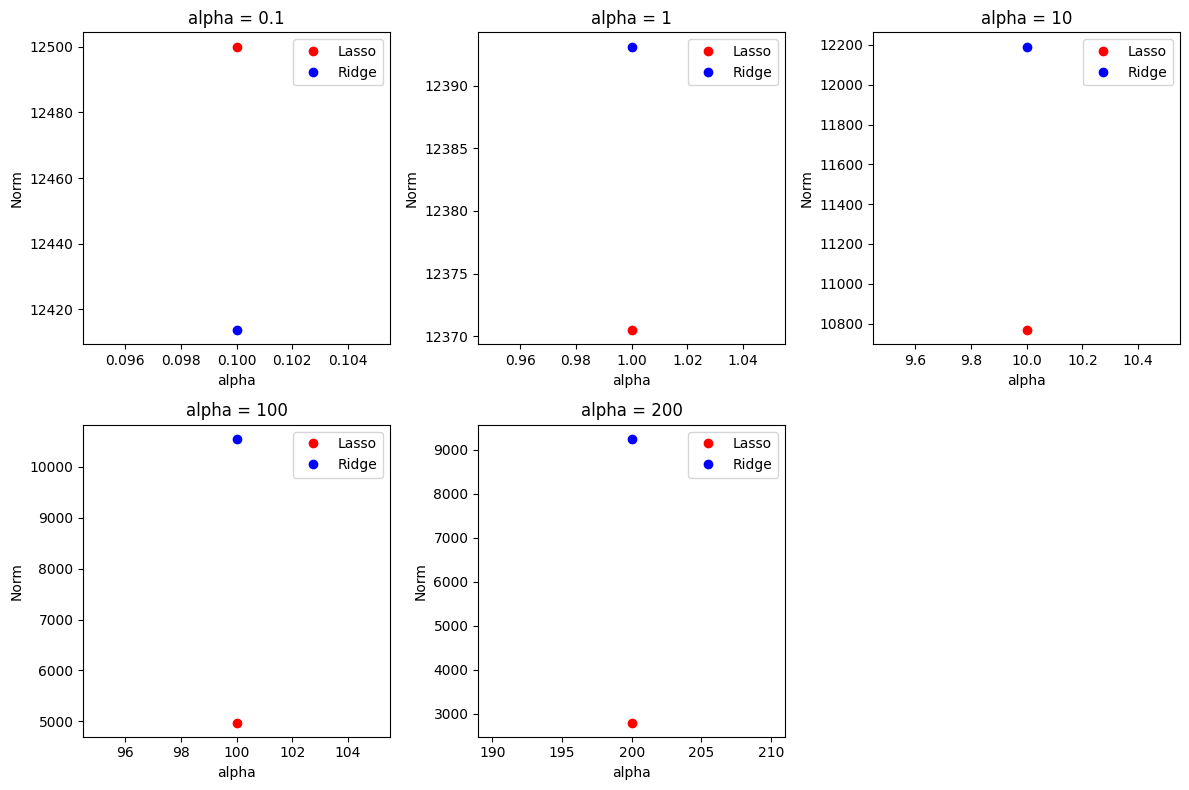

In [29]:
plt.figure(figsize=(12, 8))
alphas = [0.1,1,10,100,200]
for i, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha)
    ridge = Ridge(alpha=alpha)
    lasso.fit(X, y)
    ridge.fit(X, y)

    lasso_norm = np.linalg.norm(lasso.coef_)
    ridge_norm = np.linalg.norm(ridge.coef_)
    plt.subplot(2, 3, i+1);  # 2 строки, 3 столбца, текущий график
    plt.plot(alpha, lasso_norm, 'ro', label='Lasso')
    plt.plot(alpha, ridge_norm, 'bo', label='Ridge')
    plt.title(f'alpha = {alpha}')
    plt.xlabel('alpha')
    plt.ylabel('Norm')
    plt.legend()

plt.tight_layout()
plt.show()

***Cross-Validation***

Depending on the value of the parameter $\alpha$ in Lasso regression, different coefficient estimates are set to zero. The optimal value of $\alpha$ can be selected, for example, using cross-validation on the training set.

To perform cross-validation, the LassoCV module can be used. This module takes a list of $\alpha$ values (parameter alphas) and performs cross-validation for each value in the list during training, storing the MSE for each fold of the cross-validation (the number of folds is the cv parameter) in an error matrix (so the resulting matrix will have dimensions len(alphas) $\times$ cv). After training the model, the error matrix can be accessed via the .mse_path_ attribute.

Note that the model may not use $\alpha$ values in the order you provide them to the function: to determine the order, use the .alphas_ attribute. Set the number of folds for cross-validation (parameter cv) to 5.

Let's average the errors for each value of $\alpha$ (i.e., across the rows of the error matrix) and select the value that gives the highest quality.

In [30]:
from sklearn.linear_model import LassoCV

In [31]:
model = LassoCV(n_alphas=5)
model.fit(X_train,y_train)
ans = np.mean(model.mse_path_,axis =1)
minimum = np.argmin(ans)
ans = model.alphas_[minimum]
ans


3.9782828879100234

***Training and getting the new coef***

 Training the final Lasso regression with the selected $\alpha$ parameter on the training set.




In [32]:
lasso = Lasso(alpha = 3.9782828879100234)
lasso.fit(X_train,y_train)

lasso.coef_

array([ 1.06297821e+04, -6.75605146e+01, -3.21994959e+01, -7.91719591e+02,
       -0.00000000e+00, -0.00000000e+00,  4.39748866e+02,  2.39819131e+02,
        1.86994637e+02,  0.00000000e+00, -4.68913025e+02, -9.17789560e+02,
       -1.78037535e+03, -4.10679926e+03,  9.06399015e+02, -6.62272010e+02,
       -1.60317646e+03,  1.93670504e+02, -7.20333182e+01,  6.16671330e+02,
        5.60069008e+02, -6.24814672e+02, -1.06233171e+02,  8.50865926e+01,
        1.05611562e+01, -0.00000000e+00])

In [33]:
coeficients = np.abs(lasso.coef_)

significant_coefs_indices_2 = np.where(coeficients> 1)[0]
ans = data.columns[significant_coefs_indices_2][:5]
ans

Index(['carat', 'depth', 'table', 'price', 'z'], dtype='object')

After training the final Lasso regression, some of the feature coefficients were significantly reduced, and others were even set to zero. This suggests that certain features have little to no contribution to predicting the target variable, making them uninformative.

*On the other hand, the features with non-zero coefficients are likely the most important predictors in the model.*

 The reduction or elimination of certain coefficients can be attributed to the Lasso method's ability to perform feature selection by penalizing the absolute size of the coefficients, thereby shrinking less important ones towards zero.

***Checking the MSE***


In [34]:
y_pred_lasso = lasso.predict(X_test)
y_pred_test = las.predict(X_test)
mse_new = mean_squared_error(y_pred_lasso,y_test)
mse_test = mean_squared_error(y_pred_test,y_test)
print(f'Accuracy before {mse_test}\n Accuracy after {mse_new}')

Accuracy before 1287152.2432323592
 Accuracy after 1249488.8142681355


*After making predictions with the trained Lasso regression and comparing the mean squared errors with the regular linear regression, it was found that one model performed better than the other.*

 *The Lasso regression often outperforms the standard linear regression in cases where there is multicollinearity or when the dataset contains many irrelevant or redundant features.*
  *This is because Lasso regression introduces a penalty that shrinks the coefficients of less important features to zero, effectively performing feature selection and reducing overfitting.*

  *As a result, Lasso regression can provide more accurate predictions on new data, especially in cases where simpler models are more robust.*